In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Labels for each instance
labels = [
    "n=4", "n=5", "n=6", "n=7", "n=8", "n=9", "n=10", "n=15",
    "n=4", "n=5", "n=6", "n=7", "n=8", "n=9", "n=10", "n=15"
]

# Data for each field
avg_random = [1.5, 2.5, 3.0, 3.0, 6.0, 8.0, 8.0, 24.5, 2.5, 3.5, 7.0, 9.0, 11.0, 16.0, 21.5, 41.0]
avg = [2.65, 3.17, 4.48, 4.71, 6.65, 8.83, 9.02, 27.54, 3.65, 4.37, 7.98, 9.64, 11.63, 16.69, 21.99, 42.16]
avg_top_10 = [2.66, 3.61, 5.0, 5.48, 7.58, 10.14, 12.86, 32.95, 3.78, 4.85, 8.85, 11.63, 12.40, 17.60, 20.78, 48.38]
avg_top_5 = [2.89, 4.0, 5.0, 5.69, 7.56, 10.37, 13.0, 32.56, 3.87, 5.0, 9.0, 12.0, 13.33, 17.43, 20.0, 48.80]
avg_top_3 = [2.96, 4.0, 5.0, 5.87, 7.30, 10.56, 13.0, 32.30, 3.95, 5.0, 9.0, 12.0, 13.83, 17.69, 20.0, 48.24]
maxcut_qaoa = [3, 4, 5, 6, 7, 11, 13, 32, 4, 5, 9, 12, 15, 18, 20, 48]
maxcut_bruteforce = [3, 4, 5, 6, 10, 13, 13, 35, 4, 5, 9, 12, 15, 20, 25, 53]

# Grouped data for bar plotting
data = [
    avg_random, avg, avg_top_10, avg_top_5, avg_top_3, maxcut_qaoa, maxcut_bruteforce
]
data_labels = [
    "Mean random", "Mean", "Mean top 10", "Mean top 5", "Mean top 3", "Maxcut QAOA", "Maxcut bruteforce"
]

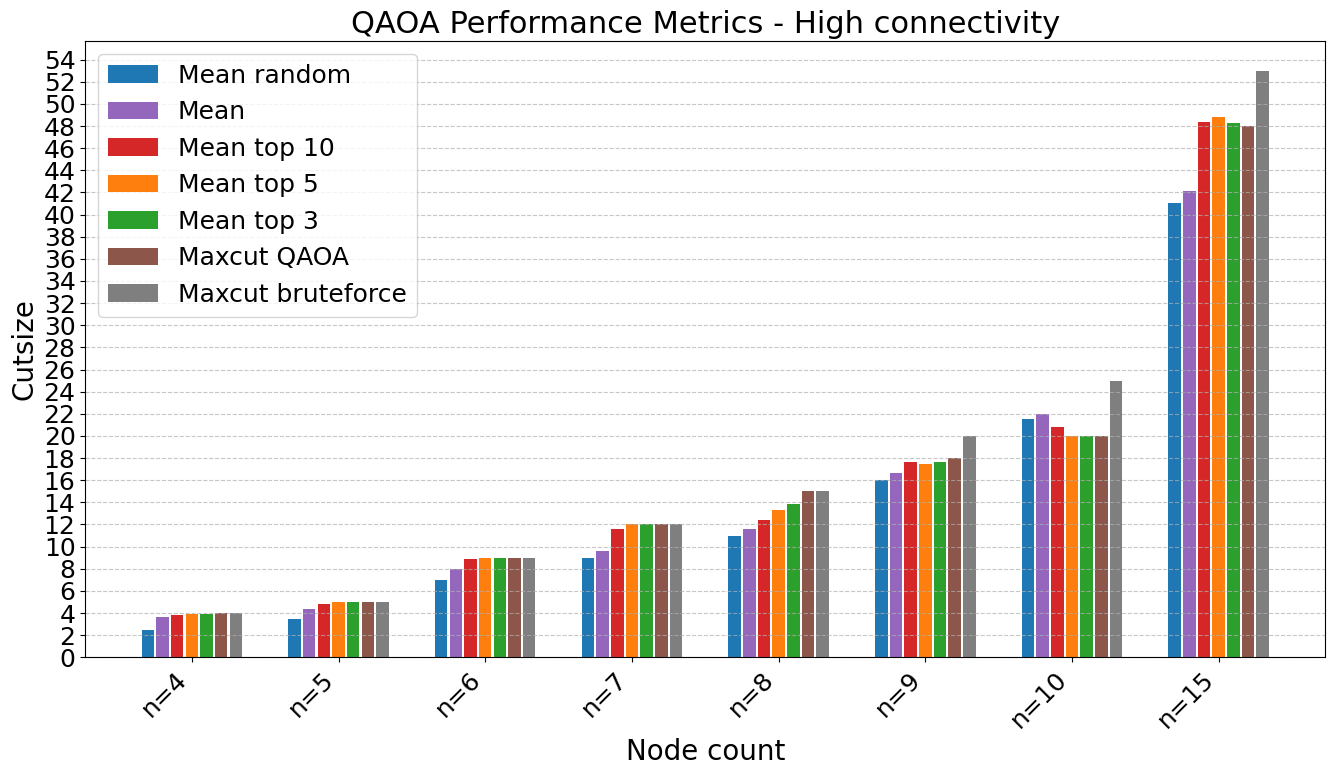

In [ ]:
# Split data into "low" and "high" parts
labels_low = labels[:8]
labels_high = labels[8:]

data_low = [d[:8] for d in data]
data_high = [d[8:] for d in data]

x_low = np.arange(len(labels_low))
x_high = np.arange(len(labels_high))
width = 0.1  # bar width

# colors = [
#     '#AFCBFF',
#     '#BDB3E5',
#     '#CCA9D6',
#     '#D69ABF',
#     '#E18A9C',
#     '#F28B82',
#     "#797979"   
# ]

colors = [
    '#1F77B4',  # strong blue
    '#9467BD',  # purple
    '#D62728',  # red
    '#FF7F0E',  # orange
    '#2CA02C',  # green
    '#8C564B',  # brown
    '#7F7F7F'   # medium gray
]

# colors = [
#     '#8AB6FF',  # brighter pastel blue
#     '#9F84D6',  # deeper lavender purple
#     '#C072B9',  # richer mauve
#     '#D16A8C',  # dusty rose
#     '#E28C81',  # soft coral
#     '#F2A17F',  # pastel orange
#     '#6E6E6E'   # darker gray for contrast
# ]

# Plot "low" instances and save as one image
fig1, ax1 = plt.subplots(figsize=(16, 8))

for i, values in enumerate(data_low):
    ax1.bar(x_low + i * width, values, width-0.015, label=data_labels[i], color=colors[i])
ax1.set_ylabel('Cutsize', fontsize=20)
ax1.set_xlabel('Node count', fontsize=20)
ax1.set_title('QAOA Performance Metrics - Low connectivity', fontsize=22)
ax1.set_xticks(x_low + width * 3)
ax1.set_xticklabels(labels_low, rotation=45, ha='right', fontsize=18)
ax1.legend(fontsize=18)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='y', labelsize=18)

max_y_low = max(max(values) for values in data_low)
yticks_low = np.arange(0, max_y_low + 2, 2)
ax1.set_yticks(yticks_low)

fig1.tight_layout()
fig1.savefig('qaoa_low_connectivity.png')  # Saves the first plot as PNG
plt.close(fig1)  # Close the figure to free memory

# Plot "high" instances and save as another image
fig2, ax2 = plt.subplots(figsize=(16, 8))

for i, values in enumerate(data_high):
    ax2.bar(x_high + i * width, values, width-0.015, label=data_labels[i], color=colors[i])
ax2.set_ylabel('Cutsize', fontsize=20)
ax2.set_xlabel('Node count', fontsize=20)
ax2.set_title('QAOA Performance Metrics - High connectivity', fontsize=22)
ax2.set_xticks(x_high + width * 3)
ax2.set_xticklabels(labels_high, rotation=45, ha='right', fontsize=18)
ax2.legend(fontsize=18)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.tick_params(axis='y', labelsize=18)

max_y_high = max(max(values) for values in data_high)
yticks_high = np.arange(0, max_y_high + 2, 2)
ax2.set_yticks(yticks_high)

fig2.tight_layout()
fig2.savefig('qaoa_high_connectivity.png')  # Saves the second plot as PNG
plt.close(fig2)


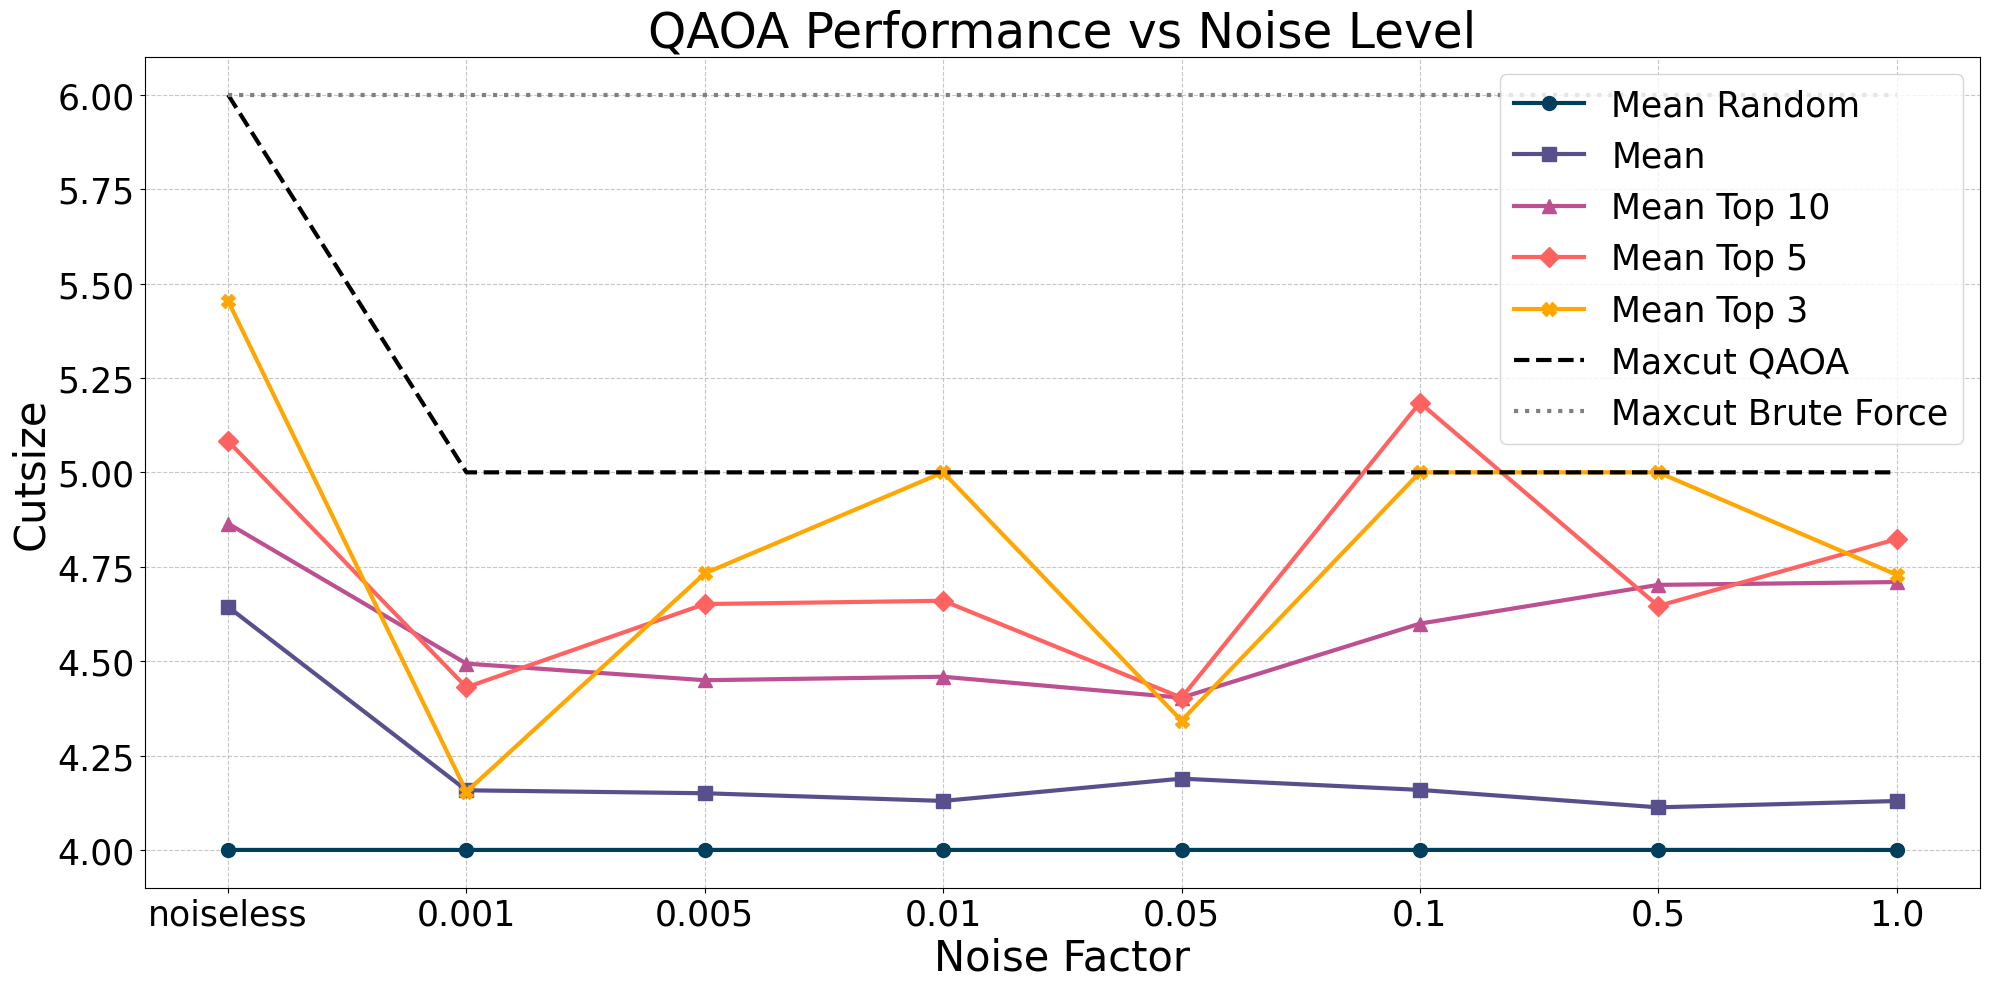

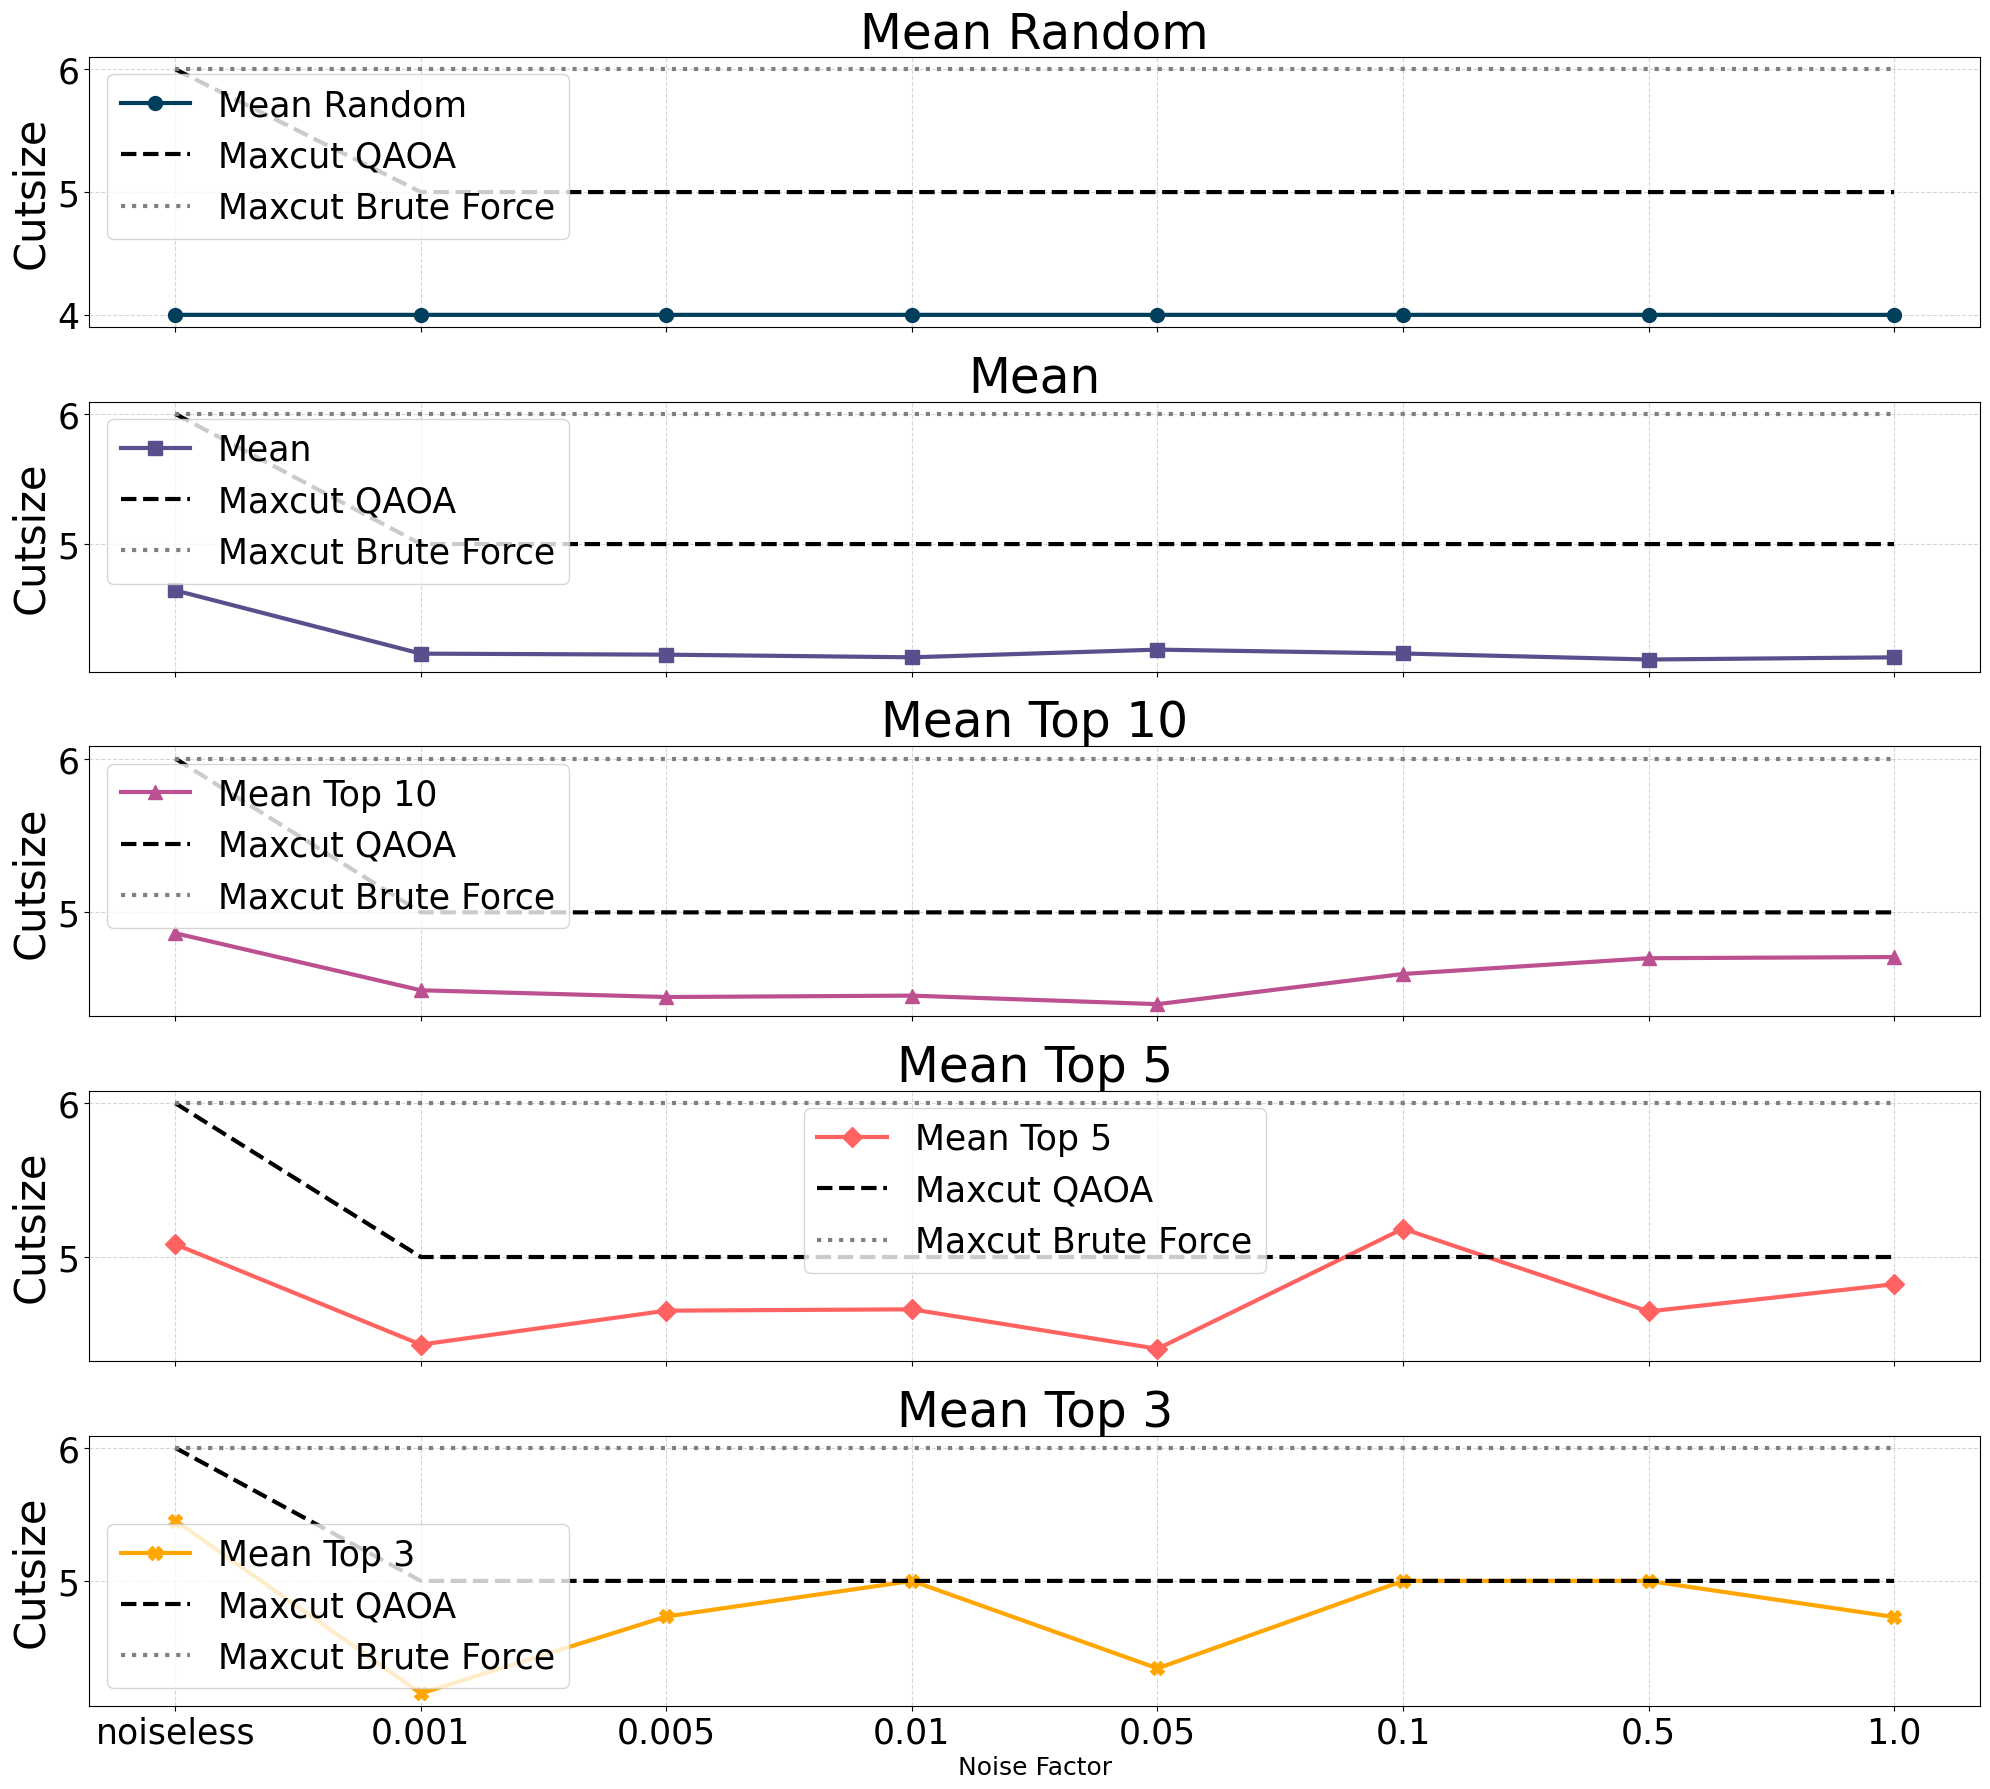

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Raw data as a multiline string
raw_data = """
[noiseless.png]
mean_random = 4.0
mean = 4.643840356123794
mean_top_10 = 4.864378738877569
mean_top_5 = 5.082575001393228
mean_top_3 = 5.453908944973011
maxcut_qaoa = 6
maxcut_bruteforce = 6

[noise_0.001.png]
noise_factor = 0.001
mean_random = 3.9999999129896984
mean = 4.157917679408557
mean_top_10 = 4.493401567610075
mean_top_5 = 4.43071531520479
mean_top_3 = 4.15412744454891
maxcut_qaoa = 5
maxcut_bruteforce = 6

[noise_0.005.png]
noise_factor = 0.005
mean_random = 4.000000202880829
mean = 4.150112009355129
mean_top_10 = 4.449491092453718
mean_top_5 = 4.651207503349154
mean_top_3 = 4.73252923274962
maxcut_qaoa = 5
maxcut_bruteforce = 6

[noise_0.01.png]
noise_factor = 0.01
mean_random = 4.000001505301435
mean = 4.129762976704836
mean_top_10 = 4.458669686970271
mean_top_5 = 4.659886669956177
mean_top_3 = 5.0
maxcut_qaoa = 5
maxcut_bruteforce = 6

[noise_0.05.png]
noise_factor = 0.05
mean_random = 3.999999002555957
mean = 4.188790845122198
mean_top_10 = 4.403174002321715
mean_top_5 = 4.403272898536346
mean_top_3 = 4.342382881667725
maxcut_qaoa = 5
maxcut_bruteforce = 6

[noise_0.1.png]
noise_factor = 0.1
mean_random = 3.999997582318249
mean = 4.1589921800305225
mean_top_10 = 4.599324923580814
mean_top_5 = 5.184345335159913
mean_top_3 = 5.0
maxcut_qaoa = 5
maxcut_bruteforce = 6

[noise_0.5.png]
noise_factor = 0.5
mean_random = 4.000039704771528
mean = 4.112773715247255
mean_top_10 = 4.701940541376661
mean_top_5 = 4.646151566181082
mean_top_3 = 5.0
maxcut_qaoa = 5
maxcut_bruteforce = 6

[noise_1.png]
noise_factor = 1
mean_random = 3.9999136337198786
mean = 4.129559025752278
mean_top_10 = 4.7094501751963955
mean_top_5 = 4.823159134378615
mean_top_3 = 4.728753580809295
maxcut_qaoa = 5
maxcut_bruteforce = 6
"""

# Parse data
pattern = r"\[(.*?)\]\s*(.*?)\s*(?=\[|$)"
matches = re.findall(pattern, raw_data, re.DOTALL)

noise_levels = []
mean_random = []
mean = []
mean_top_10 = []
mean_top_5 = []
mean_top_3 = []
maxcut_qaoa = []
maxcut_bruteforce = []

for name, block in matches:
    lines = block.strip().splitlines()
    values = dict()
    for line in lines:
        key, val = map(str.strip, line.split("="))
        values[key] = float(val)
    
    noise_label = "noiseless" if "noiseless" in name else values.get("noise_factor", 0)
    noise_levels.append(noise_label)
    mean_random.append(values["mean_random"])
    mean.append(values["mean"])
    mean_top_10.append(values["mean_top_10"])
    mean_top_5.append(values["mean_top_5"])
    mean_top_3.append(values["mean_top_3"])
    maxcut_qaoa.append(values["maxcut_qaoa"])
    maxcut_bruteforce.append(values["maxcut_bruteforce"])

# Convert to NumPy arrays for convenience
noise_levels = np.array(noise_levels)
mean_random = np.array(mean_random)
mean = np.array(mean)
mean_top_10 = np.array(mean_top_10)
mean_top_5 = np.array(mean_top_5)
mean_top_3 = np.array(mean_top_3)
maxcut_qaoa = np.array(maxcut_qaoa)
maxcut_bruteforce = np.array(maxcut_bruteforce)

# Colors and markers
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
markers = ['o', 's', '^', 'D', 'X']
labels = ["Mean Random", "Mean", "Mean Top 10", "Mean Top 5", "Mean Top 3"]
datasets = [mean_random, mean, mean_top_10, mean_top_5, mean_top_3]

# --- Combined Line Plot ---
plt.figure(figsize=(20, 10))  # Make figure taller & wider
for data, label, color, marker in zip(datasets, labels, colors, markers):
    plt.plot(noise_levels, data, label=label, color=color, marker=marker, markersize=10, linewidth=3)

plt.plot(noise_levels, maxcut_qaoa, label="Maxcut QAOA", linestyle="--", color="black", linewidth=3)
plt.plot(noise_levels, maxcut_bruteforce, label="Maxcut Brute Force", linestyle=":", color="gray", linewidth=3)

plt.xlabel("Noise Factor", fontsize=30)
plt.ylabel("Cutsize", fontsize=30)
plt.title("QAOA Performance vs Noise Level", fontsize=35)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25, loc="best")
plt.tight_layout()


# --- Stacked Thin Plots ---
fig, axs = plt.subplots(5, 1, figsize=(20, 18), sharex=True)  # Increased height for clarity
plt.subplots_adjust(hspace=0.5)

for ax, data, label, color, marker in zip(axs, datasets, labels, colors, markers):
    ax.plot(noise_levels, data, label=label, color=color, marker=marker, markersize=10, linewidth=3)
    ax.plot(noise_levels, maxcut_qaoa, label='Maxcut QAOA', color='black', linestyle='--', linewidth=3)
    ax.plot(noise_levels, maxcut_bruteforce, label='Maxcut Brute Force', color='grey', linestyle=':', linewidth=3)
    ax.set_ylabel("Cutsize", fontsize=30)
    ax.set_title(label, fontsize=35)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', labelsize=25)
    ax.legend(fontsize=25, loc="best")

axs[-1].set_xlabel("Noise Factor", fontsize=18)
plt.tight_layout()
# plt.savefig("qaoa_plot.png", format="png", bbox_inches="tight", dpi=300)
